# MAKE SURE YOU PULL THE DATA FILES FROM TEAMS BEFORE YOU START PLAYING AROUND IN HERE.

We are using oracle-cards-20250127220801.json

Our repo has the data folder in the .gitignore so we don't clutter up the GitHub repo.

In [22]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn
import numpy as np

# import nltk



# Read Data

In [23]:
data = pd.read_json('../data/external/oracle-cards-20250127220801.json')

In [24]:
data.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'cardmarket_id', 'name',
       'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line',
       'oracle_text', 'power', 'toughness', 'colors', 'color_identity',
       'keywords', 'legalities', 'games', 'reserved', 'foil', 'nonfoil',
       'finishes', 'oversized', 'promo', 'reprint', 'variation', 'set_id',
       'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'watermark', 'flavor_text',
       'card_back_id', 'artist', 'artist_ids', 'illustration_id',
       'border_color', 'frame', 'frame_effects', 'security_stamp', 'full_art',
       'textless', 'booster', 'story_spotlight', 'preview', 'prices',
       'related_uris', 'purchase_uris', 'mtgo_id', 'mtgo_foil_id',
       'tcgplayer_id', 'edhrec_rank', 'penny_rank', 'arena_id',

## Down select columns from data

In [45]:
data.set.unique()

array(['drc', '7ed', 'm14', 'c19', '9ed', 'ymkm', 'ulg', 'war', 'woe',
       'scg', 'me1', 'otc', 'ody', 'arb', 'jmp', 'xln', 'vma', 'da1',
       'c13', 'm20', 'hou', 'me3', 'znc', '10e', '5ed', 'und', 'moc',
       'afdn', 'zen', 'shm', 'mm2', 't40k', 'aone', 'me4', 'tinr', 'apc',
       'snc', 'ust', 'gs1', 'mkm', 'afc', 'aneo', 'lcc', 'por', 'rix',
       'inv', 'iko', 'twoc', 'frf', 'nec', 'm12', 'dom', 'clb', 'ltr',
       'cn2', 'astx', 'one', 's99', 'emn', 'khm', 'lgn', 'akh', 'dmc',
       'lrw', 'aer', 'neo', 'cns', 'mh3', 'td2', 'eld', 'acr', 'a25',
       'rav', 'mh2', 'p02', 'ths', 'tcmm', 'm19', 'avr', 'j22', 'dsk',
       'mb2', 'afr', 'ktk', 'mkc', 'fdn', 'blb', 'rvr', 'fj25', 'bro',
       'isd', 'dst', 'clu', 'mbs', 'c16', 'm15', 'aafr', 'otj', 'wwk',
       'tmp', 'mh1', 'bfz', 'j21', 'm3c', 'pca', 'nem', 'cmm', 'abro',
       'asnc', 'ala', 'mir', 'e01', 'stx', '40k', 'jou', 'jud', 'thb',
       'avow', 'mrd', 'fem', 'unf', 'm13', 'pls', 'totc', 'dmu', 'lci',
     

In [34]:
# Create new dataframe with selected columns and filter out reprints
selected_df = data[['name', 'mana_cost', 'type_line', 'oracle_text', 'power', 'toughness', 'colors', 'keywords', 'mtgo_id', 'loyalty', 'defense']]

In [35]:
selected_df

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33826,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33827,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33828,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33829,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


In [37]:
unique_keywords = list(set([keyword for keywords in data['keywords']for keyword in keywords]))


unique_keywords

['Collect evidence',
 'Conspire',
 'Nitro-9',
 'Midnight Entity',
 'Grand Strategist',
 'Healing Tears',
 'Rapid Regeneration',
 'Praise Him',
 'Mark of Chaos Ascendant',
 'Encore',
 'Battle Cry',
 'Look to the Stars',
 'Body Thief',
 'Delirium',
 'Fuse',
 'Fire of Tzeentch',
 'Weird Insight',
 'Psychic Stimulus',
 'Transform',
 'Stimpak',
 'Toxic Spores',
 'Mold Harvest',
 'Strike first',
 'For Auld Lang Syne',
 'Manifest dread',
 'Dethrone',
 'Legendary landwalk',
 'Landcycling',
 'Heroic',
 'Water Always Wins',
 'Stew',
 'Rulebreaker',
 'Skulk',
 "Everypony's Invited",
 'Unearthly Power',
 'Mold Earth',
 'Epic',
 'Arcane Life-support',
 'Titanic',
 'Blind Betrayal',
 'Persist',
 "Hero's Reward",
 'Kinship',
 'Imprint',
 'Undaunted',
 'Phaeron',
 'Discover',
 'Chainsword',
 'Miracle',
 'Conjure',
 'Hellbent',
 'Islandcycling',
 'Devastating Charge',
 'Myriad',
 'Connive',
 'The Last Centurion',
 'Sage Project',
 'Guardian Protocols',
 'Parley',
 'Ninjutsu',
 'How Civil of You',
 'Tem

In [38]:
# Create dictionary to store keyword locations
keyword_locations = {}

# Iterate through dataframe and collect locations
for idx, row in data.iterrows():
    for keyword in row['keywords']:
        if keyword in keyword_locations:
            keyword_locations[keyword].append(idx)
        else:
            keyword_locations[keyword] = [idx]

# Sort by keyword
sorted_keywords = dict(sorted(keyword_locations.items()))

# Print results
for keyword, indices in sorted_keywords.items():
    print(f"{keyword}: appears in rows {indices}")

# Optional: Get just unique keywords list
unique_keywords = list(sorted_keywords.keys())

... Catch: appears in rows [16466]
A Thousand Souls Die Every Day: appears in rows [21914]
Aberrant Tinkering: appears in rows [28236]
Adamant: appears in rows [1379, 2841, 3268, 3406, 4076, 5107, 6299, 6722, 6772, 13632, 14689, 20985, 26580, 27395, 28086, 28131, 31568, 32550]
Adapt: appears in rows [11, 564, 1050, 1877, 3523, 6826, 7448, 8183, 9657, 10515, 11241, 12002, 15376, 17364, 20505, 21167, 22072, 24276, 24308, 25843, 26795, 29520, 30835, 33218, 33426]
Addendum: appears in rows [276, 5181, 14122, 18264, 19099, 19905, 22631, 22890, 23537, 27008]
Advanced Species: appears in rows [11225]
Aegis of the Emperor: appears in rows [30007]
Affinity: appears in rows [17, 82, 952, 1028, 1115, 2667, 2884, 2895, 3574, 3860, 4819, 5641, 5915, 6078, 6694, 7953, 8332, 8747, 10962, 12012, 12104, 13171, 14872, 15138, 16002, 16752, 17089, 17842, 17857, 17915, 20591, 20787, 20788, 21494, 21497, 22246, 22932, 23153, 25253, 26304, 26988, 27001, 27234, 27277, 27942, 30006, 30302, 31125, 32117]
Affirm

In [42]:
selected_df.loc[12789]

name                                             Canoptek Wraith
mana_cost                                                    {3}
type_line                             Artifact Creature — Wraith
oracle_text    Wraith Form — Canoptek Wraith can't be blocked...
power                                                          2
toughness                                                      1
colors                                                        []
keywords                   [Transdimensional Scout, Wraith Form]
mtgo_id                                                 108778.0
loyalty                                                      NaN
defense                                                      NaN
Name: 12789, dtype: object

In [44]:
# Create dictionaries for frequencies and locations
keyword_freq = {}
keyword_locations = {}

# Count frequencies and store locations
for idx, row in data.iterrows():
    for keyword in row['keywords']:
        # Update frequency count
        keyword_freq[keyword] = keyword_freq.get(keyword, 0) + 1
        # Store location
        if keyword in keyword_locations:
            keyword_locations[keyword].append(idx)
        else:
            keyword_locations[keyword] = [idx]

# Sort by frequency (highest to lowest)
sorted_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=False))

# Print results with both frequency and locations
for keyword, freq in sorted_keywords.items():
    print(f"{keyword}: appears {freq} times in rows {keyword_locations[keyword]}")

# Store sorted unique keywords if needed
unique_keywords = list(sorted_keywords.keys())


Shrieking Gargoyles: appears 1 times in rows [169]
Phalanx Commander: appears 1 times in rows [223]
Feed: appears 1 times in rows [432]
Friends: appears 1 times in rows [432]
Medicus Ministorum: appears 1 times in rows [937]
Sonic Booster: appears 1 times in rows [1031]
Double agenda: appears 1 times in rows [1053]
Disarm: appears 1 times in rows [1290]
Detonate: appears 1 times in rows [1290]
Avoidance: appears 1 times in rows [1325]
Mama's Coming: appears 1 times in rows [1694]
Alluring Eyes: appears 1 times in rows [1781]
History Teacher: appears 1 times in rows [1924]
Keen Sight: appears 1 times in rows [2074]
Scavenge the Dead: appears 1 times in rows [2076]
The Most Important Punch in History: appears 1 times in rows [2103]
Wild Shape: appears 1 times in rows [2278]
Secrets of the Soul: appears 1 times in rows [2281]
Leap Strike: appears 1 times in rows [2482]
Rope Dart: appears 1 times in rows [2482]
Synapse Creature: appears 1 times in rows [2513]
Rites of Banishment: appears 1

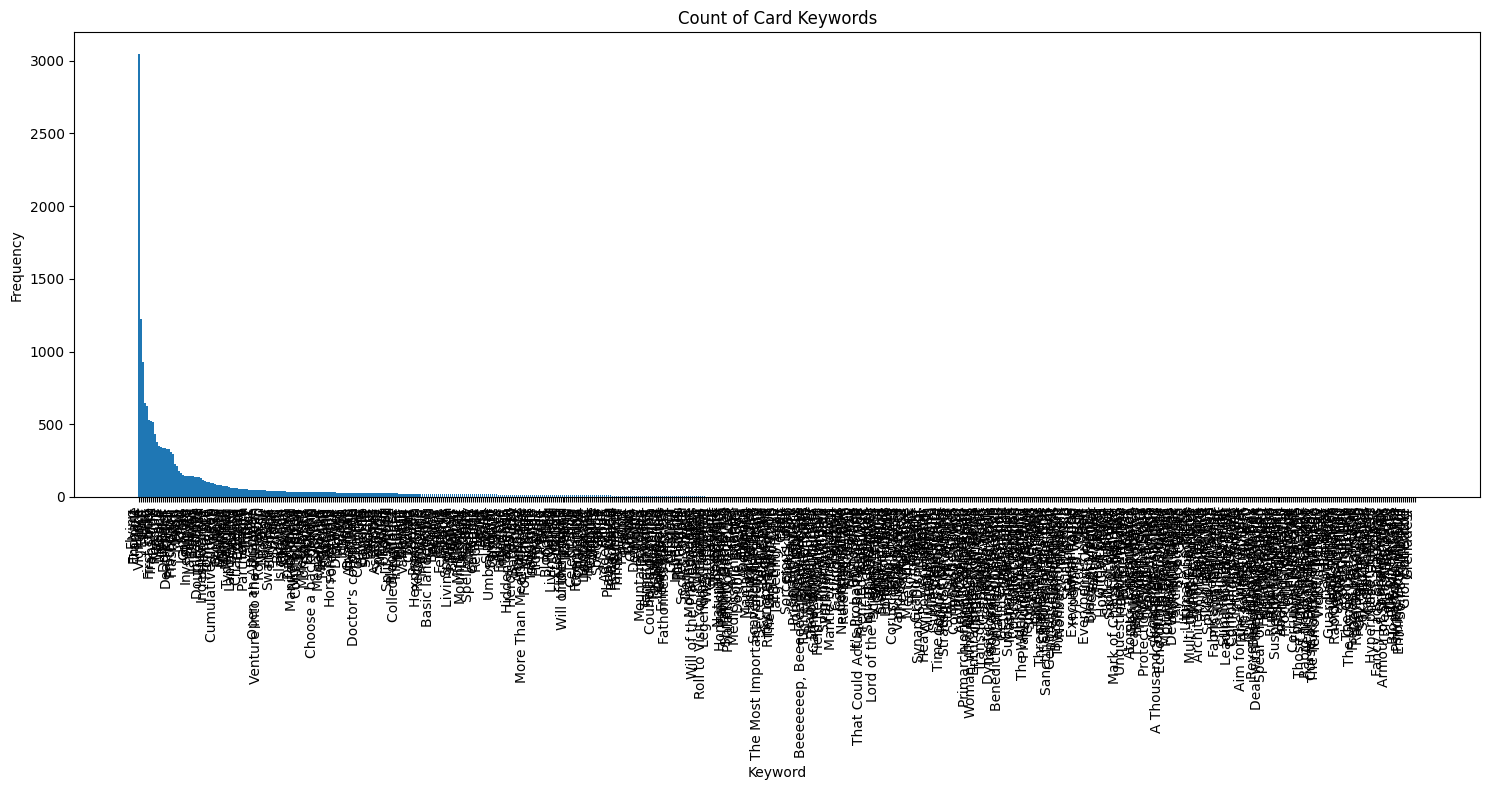

In [58]:
# Sort keywords by frequency in descending order and get top 20
hist_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)[:])

# Create bar plot
plt.figure(figsize=(15,8))
plt.bar(hist_keywords.keys(), hist_keywords.values())
plt.xticks(rotation=90, ha='right')
plt.title('Count of Card Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.tight_layout()

In [46]:
# Get list of keywords that appear only once
single_occurrence_keywords = [k for k,v in keyword_freq.items() if v == 1]

# Create mask for rows that don't contain any of the single occurrence keywords
mask = ~selected_df['keywords'].apply(lambda x: any(kw in x for kw in single_occurrence_keywords))

# Filter dataframe using mask
selected_df_reducedKW = selected_df[mask]

In [47]:
selected_df_reducedKW

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33826,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33827,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33828,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33829,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


In [48]:
len(selected_df_reducedKW)

33557

In [62]:
selected_df_reducedKW.loc[170]

name                                         Akroan Line Breaker
mana_cost                                                 {2}{R}
type_line                               Creature — Human Warrior
oracle_text    Heroic — Whenever you cast a spell that target...
power                                                          2
toughness                                                      1
colors                                                       [R]
keywords                                                [Heroic]
mtgo_id                                                  52176.0
loyalty                                                      NaN
defense                                                      NaN
Name: 170, dtype: object

In [21]:
data.name

0                      Nissa, Worldsoul Speaker
1                                    Static Orb
2                           Sensory Deprivation
3                                Road of Return
4                                    Storm Crow
                          ...                  
33826                          Without Weakness
33827                   Firesong and Sunspeaker
33828    Toralf, God of Fury // Toralf's Hammer
33829                         Samut, the Tested
33830                              Sinew Sliver
Name: name, Length: 33831, dtype: object

In [16]:
data.color_identity

0           [G]
1            []
2           [U]
3           [G]
4           [U]
          ...  
33826       [B]
33827    [R, W]
33828       [R]
33829    [G, R]
33830       [W]
Name: color_identity, Length: 33831, dtype: object

In [13]:
data['keywords']

0              [Landfall]
1                      []
2               [Enchant]
3               [Entwine]
4                [Flying]
               ...       
33826           [Cycling]
33827                  []
33828    [Trample, Equip]
33829                  []
33830                  []
Name: keywords, Length: 33831, dtype: object

I think that this is a better dataset.  The 'oracle_text' is the card wording that we'll want to train on.